In [1]:
# Import required packages
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import seaborn as sb
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
#to plot within notebook
%matplotlib inline 
%pylab inline
#setting figure size
from matplotlib.pylab import rcParams 
#for normalizing data
from sklearn.preprocessing import MinMaxScaler 

Populating the interactive namespace from numpy and matplotlib


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# downloading the Alphabet stock data in 1 hour intervals
ts = TimeSeries(key='QM6G54H15VWV99R1',output_format='pandas')
ticker='GOOGL'
data, meta_data = ts.get_intraday(symbol=ticker,interval='60min', outputsize='full')

In [3]:
#data structure
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-08-16 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 2019-05-23 09:30:00 to 2019-08-16 15:30:00
Data columns (total 5 columns):
1. open      417 non-null float64
2. high      417 non-null float64
3. low       417 non-null float64
4. close     417 non-null float64
5. volume    417 non-null float64
dtypes: float64(5)
memory usage: 19.5+ KB


In [5]:
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,417.000000,417.000000,417.000000,417.000000,4.170000e+02
mean,1133.309784,1136.713118,1129.865629,1133.231766,1.912357e+05
std,49.037677,49.631496,48.948269,49.214167,1.840642e+05
min,1031.490000,1036.000000,1027.030000,1031.689900,0.000000e+00
25%,1098.040000,1100.920000,1095.580000,1097.332500,1.029760e+05
50%,1133.180100,1136.490600,1130.660000,1133.295000,1.445190e+05
75%,1163.950000,1169.280000,1160.000000,1164.020000,2.291380e+05
max,1257.370000,1268.394000,1250.360000,1257.480000,2.765041e+06


In [6]:
#show few rows and columns of the df
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-05-23 09:30:00,1146.0699,1150.05,1141.0500,1144.425,271870.0
2019-05-23 10:30:00,1144.5150,1149.14,1139.2300,1141.495,151808.0
2019-05-23 11:30:00,1141.5500,1143.05,1133.7100,1137.420,154048.0
2019-05-23 12:30:00,1137.4351,1140.00,1133.1600,1139.045,107467.0
2019-05-23 13:30:00,1138.5000,1139.61,1136.3199,1137.120,84872.0


In [7]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-08-16 11:30:00,1176.5601,1179.3900,1174.6899,1178.11,101155.0
2019-08-16 12:30:00,1178.0250,1180.6899,1177.0879,1180.51,65800.0
2019-08-16 13:30:00,1180.8199,1182.4200,1179.5349,1180.17,129414.0
2019-08-16 14:30:00,1179.7850,1182.6300,1179.3900,1181.29,90766.0
2019-08-16 15:30:00,1181.0100,1181.0450,1178.0000,1179.49,234559.0


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


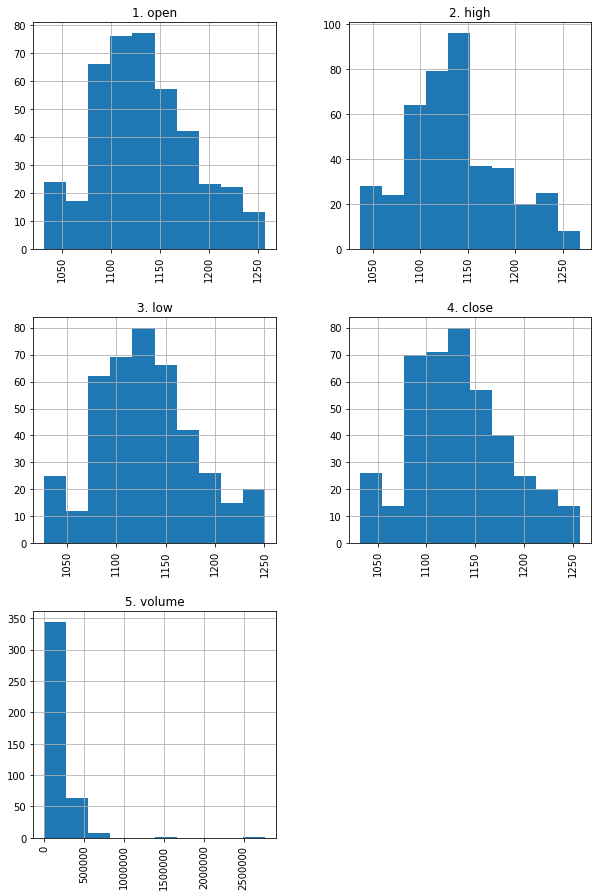

In [8]:
#plot the histogram graph of all columns
fig = plt.figure(figsize = (10,15));
ax = fig.gca();
data.hist(ax = ax,xrot=90);

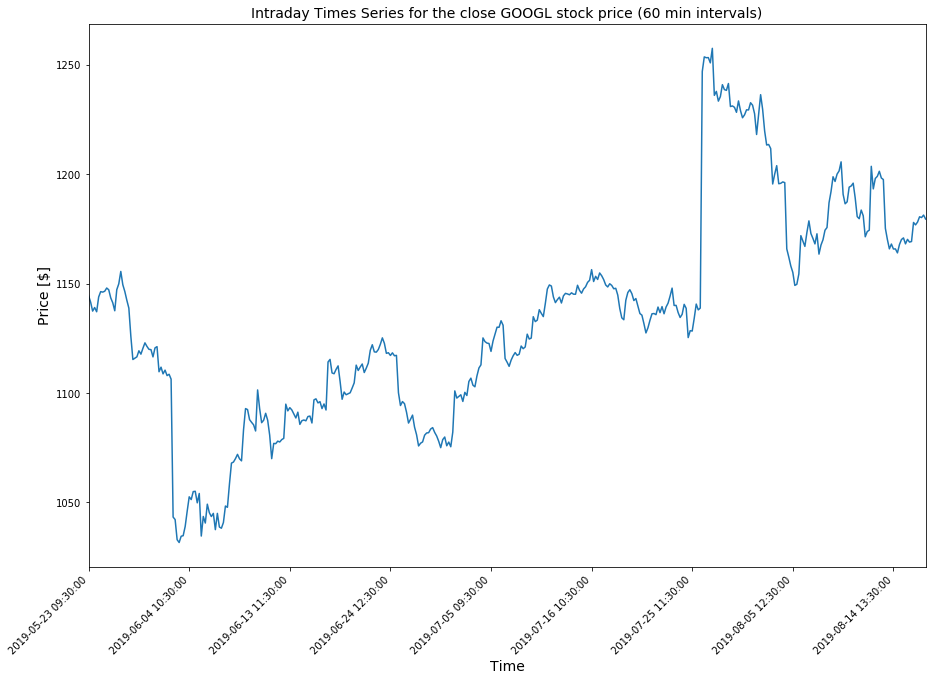

In [10]:
# plot the close column
plt.figure(figsize=(15,10));
data['4. close'].plot();
plt.title('Intraday Times Series for the close '+ticker+' stock price (60 min intervals)', size=14);
plt.xlabel('Time',size= 14);
plt.ylabel('Price [$]',size= 14);
plt.xticks(rotation=45, ha='right', size= 10);
plt.show()

In [11]:
# Analysis on daily price data
# get the full data from 2004 to 2019
data_GOOGL, meta_data = ts.get_daily(symbol='GOOGL', outputsize='full')
data_GOOGL.columns=['Open','High','Low','Close','Volume']
data_GOOGL.index.name='Date'

In [12]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-08-16',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [13]:
data_GOOGL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,100.0000,104.06,95.96,100.34,44659000.0
2004-08-20,101.4800,109.08,108.31,108.31,22834300.0
2004-08-23,110.7698,113.48,109.40,109.40,18256100.0
2004-08-24,111.2400,111.60,104.87,104.87,15247300.0
2004-08-25,104.9600,108.00,106.00,106.00,9188600.0


In [14]:
data_GOOGL.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-08-12,1180.0000,1185.61,1168.7200,1174.5000,1103200.0
2019-08-13,1174.3500,1205.43,1172.9950,1196.7300,1421700.0
2019-08-14,1176.0699,1182.79,1161.0699,1164.2500,1771500.0
2019-08-15,1168.4301,1176.42,1163.0000,1169.3199,1425300.0
2019-08-16,1180.7900,1183.84,1173.0000,1179.2100,1245800.0


In [15]:
data_GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3775 entries, 2004-08-19 to 2019-08-16
Data columns (total 5 columns):
Open      3775 non-null float64
High      3775 non-null float64
Low       3775 non-null float64
Close     3775 non-null float64
Volume    3775 non-null float64
dtypes: float64(5)
memory usage: 177.0+ KB


In [16]:
data_GOOGL.describe()

,Open,High,Low,Close,Volume
count,3775.000000,3775.000000,3775.000000,3775.000000,3.775000e+03
mean,646.644210,652.626657,643.259112,646.456462,7.267043e+06
std,267.570949,269.166312,264.183481,267.619565,8.046421e+06
min,99.090000,101.740000,95.960000,100.010000,5.206000e+05
25%,472.300000,477.500000,472.065000,472.065000,2.013650e+06
50%,584.940000,588.720600,582.400000,583.550000,4.558400e+06
75%,807.220000,813.380000,804.290400,808.000000,9.335200e+06
max,1289.120000,1296.975000,1271.710000,1296.200000,8.215110e+07


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


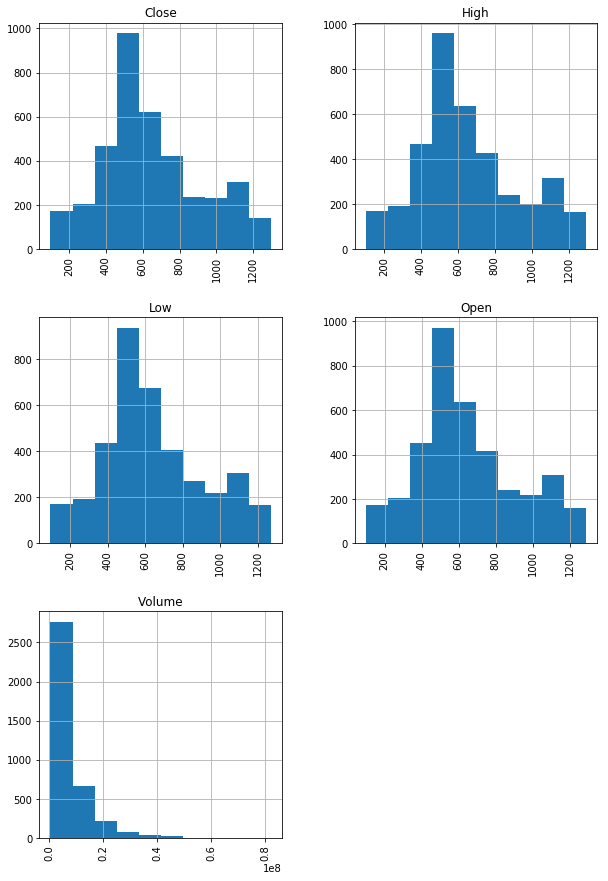

In [17]:
fig = plt.figure(figsize = (10,15));
ax = fig.gca();
data_GOOGL.hist(ax = ax,xrot=90);

In [18]:
data_GOOGL_close=data_GOOGL[['Close']]

In [19]:
data_GOOGL_close.head()

,Close
Date,
2004-08-19,100.34
2004-08-20,108.31
2004-08-23,109.40
2004-08-24,104.87
2004-08-25,106.00


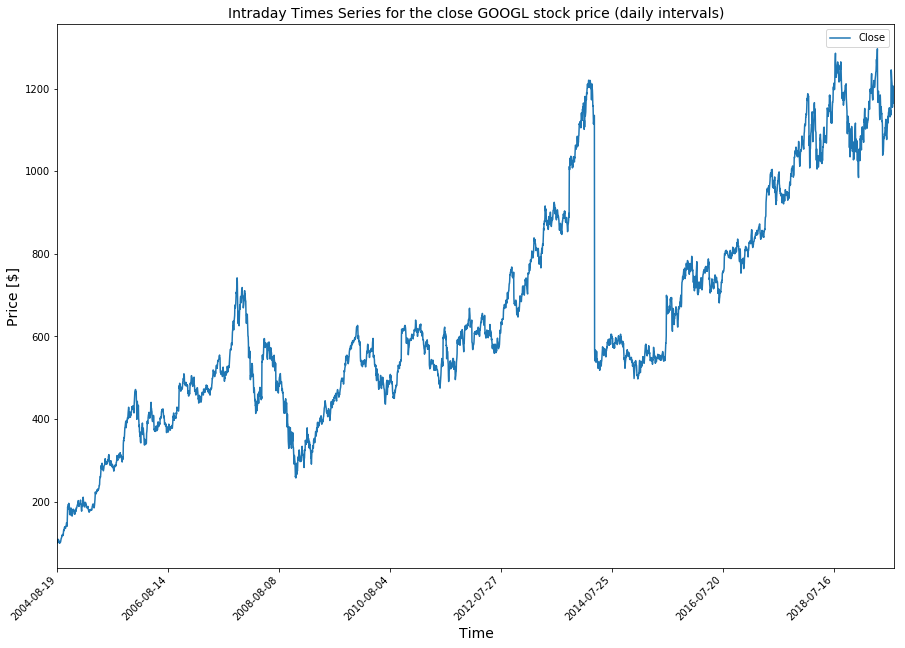

In [20]:
# plot the close column
data_GOOGL_close.plot(figsize=(15,10));
plt.title('Intraday Times Series for the close '+ticker+' stock price (daily intervals)', size=14);
plt.xlabel('Time',size= 14);
plt.ylabel('Price [$]',size= 14);
plt.xticks(rotation=45, ha='right', size= 10);
plt.show()

In [21]:
data_GOOGL['Date'] = pd.to_datetime(data_GOOGL.index,format='%Y-%m-%d')
data_GOOGL.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2004-08-19,100.0000,104.06,95.96,100.34,44659000.0,2004-08-19
2004-08-20,101.4800,109.08,108.31,108.31,22834300.0,2004-08-20
2004-08-23,110.7698,113.48,109.40,109.40,18256100.0,2004-08-23
2004-08-24,111.2400,111.60,104.87,104.87,15247300.0,2004-08-24
2004-08-25,104.9600,108.00,106.00,106.00,9188600.0,2004-08-25


In [ ]:
# single output-direct
df=data_GOOGL
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# split data for testing for plotting
train = dataset[0:-60,:]
valid = dataset[-60:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#normilizing prices
scaled_data = scaler.fit_transform(dataset)

# splitting the dataset to train and test
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data to 3D for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = []
y_test=[]

#predicting 1 value, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2,validation_data=(X_test, y_test))


closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [22]:
#storing model
import pickle
#pickle.dump(model, open("direct", 'wb'))
 
# load the model from disk
model = pickle.load(open("direct", 'rb'))

C:\Users\pouya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [23]:
# assuming model is loaded
df=data_GOOGL
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# split data for testing for plotting
train = dataset[0:-60,:]
valid = dataset[-60:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#normilizing prices
scaled_data = scaler.fit_transform(dataset)

# splitting the dataset to train and test
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data to 3D for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = []
y_test=[]

#predicting 1 value, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\pouya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


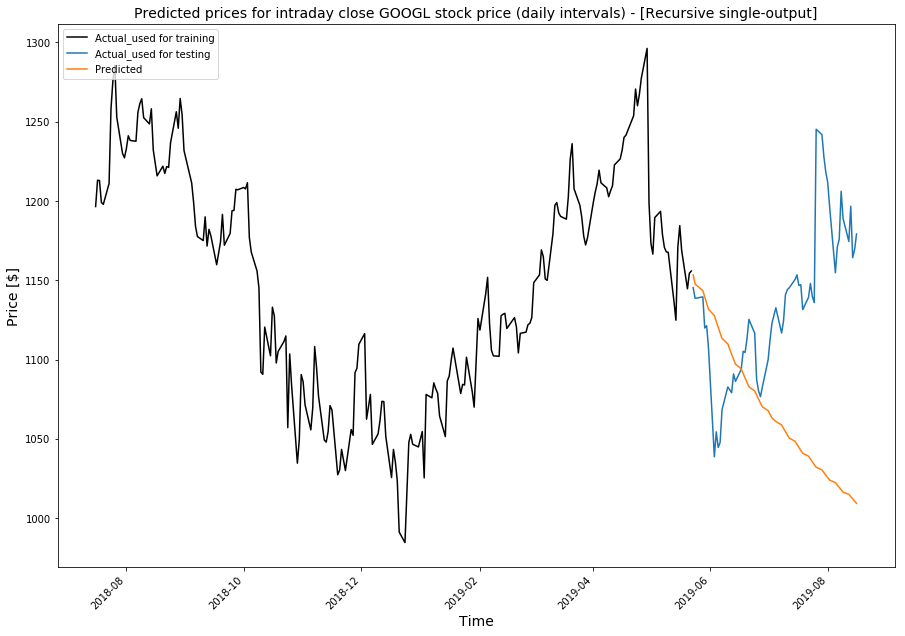

In [35]:
# plot the Recursive (single-output) predictions
closing_price=model.predict(x_train[-1:])
for i in range(1,60):
    xx=np.append(x_train[-1:][:][0][i:], closing_price, axis = 0)

    closing_price=np.append(closing_price,model.predict(np.reshape(xx, (xx.shape[1],xx.shape[0],1))), axis = 0)
closing_price = scaler.inverse_transform(closing_price)
train = new_data[3500:-60]
valid = new_data[-60:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10));
plt.plot(train['Close'],c="black")
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual_used for training','Actual_used for testing', 'Predicted'], loc='upper left')
plt.title('Predicted prices for intraday close '+ticker+' stock price (daily intervals) - [Recursive single-output]', size=14);
plt.xlabel('Time',size= 14);
plt.ylabel('Price [$]',size= 14);
plt.xticks(rotation=45, ha='right', size= 10);
plt.show()